# Gaussian Processes!

Warning: I've prioritized making nicer live demos (e.g. by using as little vertical space as possible and putting breaks between code blocks to avoid spoilers) over typical code readability standards. Additional warning: I focused on getting this ready quickly for informative live demos and didn't write it with sharing (or pedagogy around the code itself) in mind; that being said, please let me know if you find any errors! -Tamara Broderick

In [166]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
rng = np.random.RandomState()

In [167]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

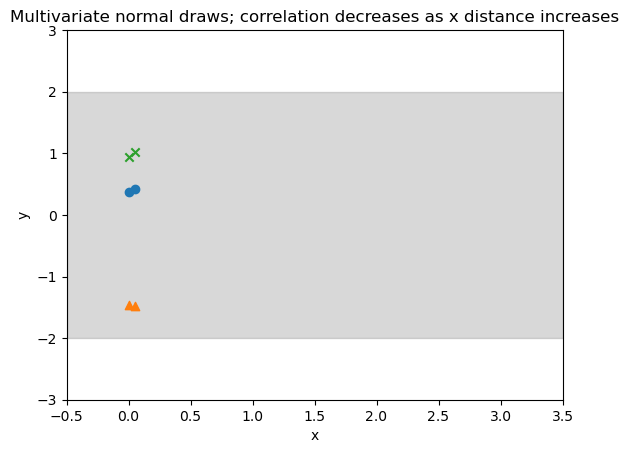

In [198]:
signal_stddev = 1.0; kern = signal_stddev**2*RBF(length_scale=1.0,length_scale_bounds="fixed") # set the kernel
n_samples = 3; gp = GaussianProcessRegressor(kernel=kern)
numx=100; xstart=-0.5; xstop=3.5; x=np.linspace(start=xstart,stop=xstop,num=numx); twosd=2*signal_stddev*np.ones(numx) # coloring 2 std dev range
plt.fill_between(x,twosd,-twosd,color="gray",alpha=0.3) # coloring 2 std dev range
xdraw=np.array([0.0,0.05]).reshape(-1,1); y_all_draws=gp.sample_y(xdraw,random_state=rng,n_samples=n_samples); marker_collection=["o","^","x"]
for i, ydraw in enumerate(y_all_draws.T): plt.scatter(xdraw,ydraw,marker=marker_collection[np.mod(i,n_samples)]) # plotting the draws
plt.xlim([xstart,xstop]); plt.ylim((-3*signal_stddev,3*signal_stddev)); pltaxes = plt.gca(); plt.xlabel("x"); plt.ylabel("y")  # make the plot
output = plt.title("Multivariate normal draws; correlation decreases as x distance increases") # make the plot

Break

Break

Break

Break

Break

Break

Break

Break

Break

Break

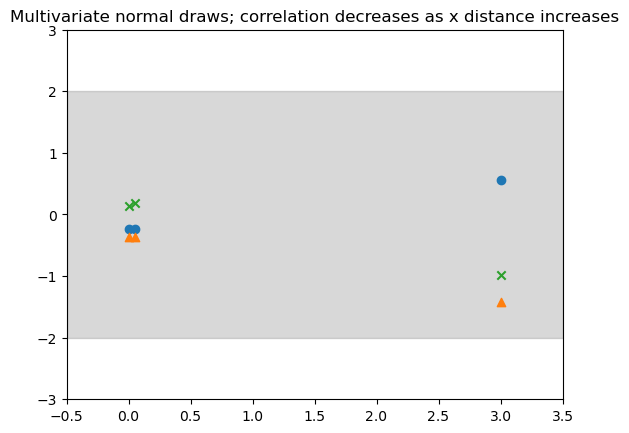

In [199]:
signal_stddev = 1.0; kern = signal_stddev**2*RBF(length_scale=1.0,length_scale_bounds="fixed") # set the kernel
gp = GaussianProcessRegressor(kernel=kern)
numx=100; xstart=-0.5; xstop=3.5; x=np.linspace(start=xstart,stop=xstop,num=numx); twosd=2*signal_stddev*np.ones(numx) # coloring 2 std dev range
plt.fill_between(x,twosd,-twosd,color="gray",alpha=0.3) # coloring 2 std dev range
xdraw=np.array([0.0,0.05,3.0]).reshape(-1,1); y_all_draws=gp.sample_y(xdraw,random_state=rng,n_samples=3); marker_collection=["o","^","x"]
for i, ydraw in enumerate(y_all_draws.T): plt.scatter(xdraw,ydraw,marker=marker_collection[np.mod(i,3)]) # plotting the draws
plt.xlim([xstart,xstop]); plt.ylim((-3*signal_stddev,3*signal_stddev)); pltaxes = plt.gca() # make the plot
output = plt.title("Multivariate normal draws; correlation decreases as x distance increases") # make the plot

Break

Break

Break

Break

Break

Break

Break

Break

Break

Break

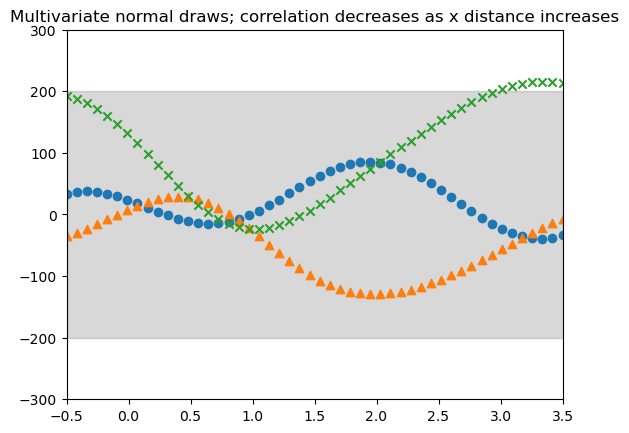

In [208]:
signal_stddev = 100.0; kern = signal_stddev**2*RBF(length_scale=1.0,length_scale_bounds="fixed") # set the kernel
gp = GaussianProcessRegressor(kernel=kern)
numx=50; xstart=-0.5; xstop=3.5; x=np.linspace(start=xstart,stop=xstop,num=numx); twosd=2*signal_stddev*np.ones(numx) # coloring 2 std dev range
plt.fill_between(x,twosd,-twosd,color="gray",alpha=0.3) # coloring 2 std dev range
xdraw=np.linspace(start=xstart,stop=xstop,num=numx).reshape(-1,1); y_all_draws=gp.sample_y(xdraw,random_state=rng,n_samples=3); marker_collection=["o","^","x"]
for i, ydraw in enumerate(y_all_draws.T): plt.scatter(xdraw,ydraw,marker=marker_collection[np.mod(i,3)]) #plt.plot(xdraw,ydraw) # plotting the draws
plt.xlim([xstart,xstop]); plt.ylim((-3*signal_stddev,3*signal_stddev)); pltaxes = plt.gca() # make the plot
output = plt.title("Multivariate normal draws; correlation decreases as x distance increases") # make the plot

Break

Break

Break

Break

Break

Break

Break

Break

Break

Break

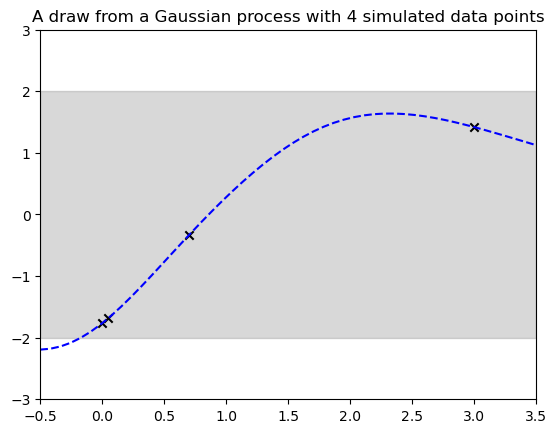

In [211]:
signal_stddev = 1.0; kern = signal_stddev**2*RBF(length_scale=1.0,length_scale_bounds="fixed") # set the kernel
gp = GaussianProcessRegressor(kernel=kern)
xobs = np.array([0.0,0.05,0.7,3.0]); Nobs = xobs.shape[0]
numx=50; xstart=-0.5; xstop=3.5; x=np.linspace(start=xstart,stop=xstop,num=numx); twosd=2*signal_stddev*np.ones(numx) # coloring 2 std dev range
plt.fill_between(x,twosd,-twosd,color="gray",alpha=0.3) # coloring 2 std dev range
xcurve=np.linspace(start=xstart,stop=xstop,num=numx); xall = np.concatenate((xcurve,xobs)).reshape(-1,1)
yall = gp.sample_y(xall,random_state=rng,n_samples=1); ycurve=yall[0:numx]; yobs=yall[numx:numx+Nobs]
plt.plot(xcurve,ycurve,linestyle="dashed",color="blue"); plt.scatter(xobs,yobs,color="black",marker="x")
plt.xlim([xstart,xstop]); plt.ylim((-3*signal_stddev,3*signal_stddev)); pltaxes = plt.gca() # make the plot
output = plt.title("A draw from a Gaussian process with " + str(Nobs) + " simulated data points") # make the plot

Break

Break

Break

Break

Break

Break

Break

Break

Break

Break

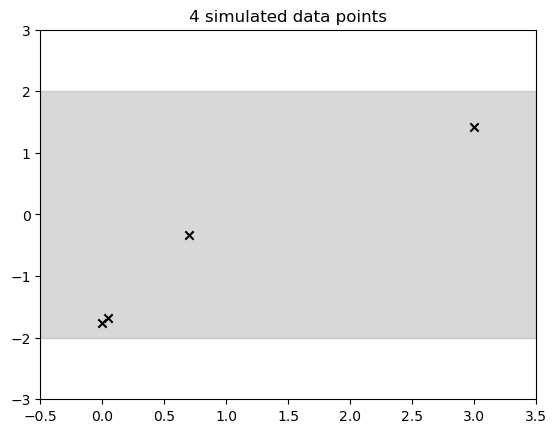

In [212]:
# just the training data
plt.fill_between(x,twosd,-twosd,color="gray",alpha=0.3) # coloring 2 std dev range
plt.scatter(xobs,yobs,color="black",marker="x")
plt.xlim([xstart,xstop]); plt.ylim((-3*signal_stddev,3*signal_stddev)); pltaxes = plt.gca() # make the plot
output = plt.title(str(Nobs) + " simulated data points") # make the plot

Break

Break

Break

Break

Break

Break

Break

Break

Break

Break

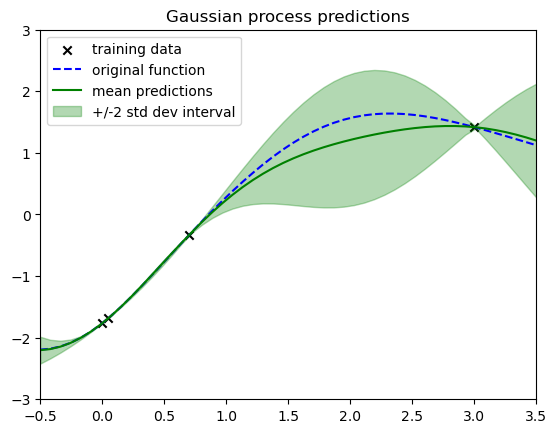

In [213]:
gpfit = GaussianProcessRegressor(kernel=kern, optimizer=None) # NOT fitting kernel hyperparameters
gpfit.fit(xobs.reshape(-1,1),yobs.reshape(-1,1))
mean_pred, stddev_pred = gpfit.predict(xcurve.reshape(-1,1), return_std=True)
plt.scatter(xobs,yobs,color="black",marker="x", label="training data")
plt.plot(xcurve,ycurve,linestyle="dashed",color="blue", label="original function")
plt.plot(xcurve,mean_pred,color="green", label="mean predictions")
plt.fill_between(xcurve,mean_pred-2*stddev_pred,mean_pred+2*stddev_pred,color="green",alpha=0.3,label=r"+/-2 std dev interval")
plt.legend(); plt.xlim([xstart,xstop]); plt.ylim((-3*signal_stddev,3*signal_stddev)); plotout = plt.title("Gaussian process predictions")

Break

Break

Break

Break

Break

Break

Break

Break

Break

Break

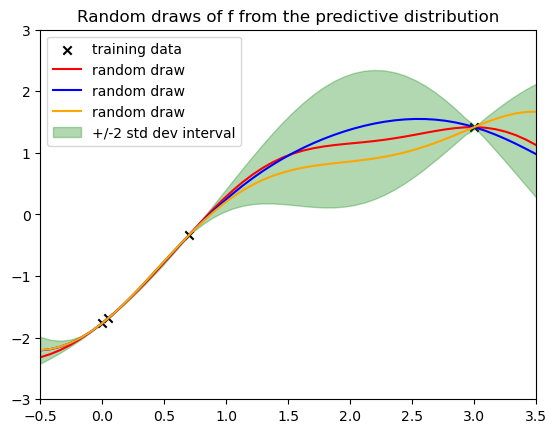

In [215]:
gpfit = GaussianProcessRegressor(kernel=kern, optimizer=None) # NOT fitting kernel hyperparameters
gpfit.fit(xobs.reshape(-1,1),yobs.reshape(-1,1))
mean_pred, stddev_pred = gpfit.predict(xcurve.reshape(-1,1), return_std=True)
y_all_draws=gpfit.sample_y(xcurve.reshape(-1,1),random_state=rng,n_samples=3)
color_options=["red","blue","orange"]
plt.scatter(xobs,yobs,color="black",marker="x", label="training data")
for i, ydraw in enumerate(y_all_draws.T): plt.plot(xcurve,ydraw,label="random draw",color=color_options[np.mod(i,3)])
plt.fill_between(xcurve,mean_pred-2*stddev_pred,mean_pred+2*stddev_pred,color="green",alpha=0.3,label=r"+/-2 std dev interval")
plt.legend(); plt.xlim([xstart,xstop]); plt.ylim((-3*signal_stddev,3*signal_stddev)); plotout = plt.title("Random draws of f from the predictive distribution")

Break

Break

Break

Break

Break

Break

Break

Break

Break

Break

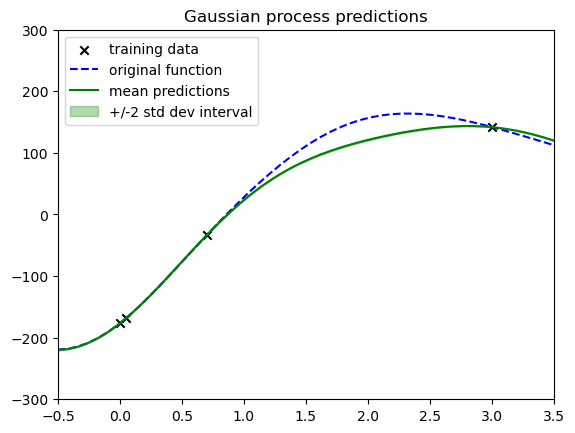

In [216]:
# observed y values are 100 times what they were in the nice example
gpfit = GaussianProcessRegressor(kernel=kern, optimizer=None) # NOT fitting kernel hyperparameters
gpfit.fit(xobs.reshape(-1,1),100*yobs.reshape(-1,1))
mean_pred, stddev_pred = gpfit.predict(xcurve.reshape(-1,1), return_std=True)
plt.scatter(xobs,100*yobs,color="black",marker="x", label="training data")
plt.plot(xcurve,100*ycurve,linestyle="dashed",color="blue", label="original function")
plt.plot(xcurve,mean_pred,color="green", label="mean predictions")
plt.fill_between(xcurve,mean_pred-2*stddev_pred,mean_pred+2*stddev_pred,color="green",alpha=0.3,label=r"+/-2 std dev interval")
plt.legend(); plt.xlim([xstart,xstop]); plt.ylim((-100*3*signal_stddev,100*3*signal_stddev)); plotout = plt.title("Gaussian process predictions")

Break

Break

Break

Break

Break

Break

Break

Break

Break

Break

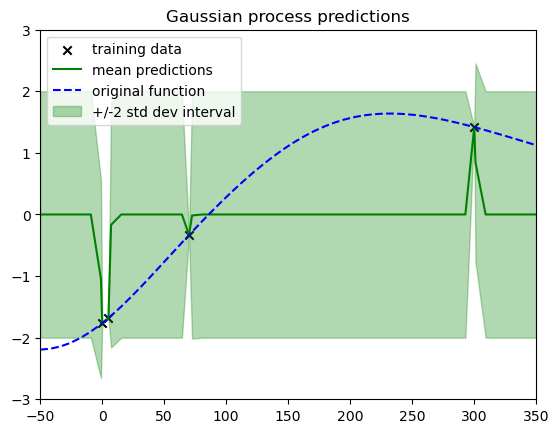

In [217]:
# observed x values are 100 times what they were in the nice example
gpfit = GaussianProcessRegressor(kernel=kern, optimizer=None) # NOT fitting kernel hyperparameters
gpfit.fit(100*xobs.reshape(-1,1),yobs.reshape(-1,1))
xall=np.sort(np.concatenate((xcurve,xobs)))
mean_pred, stddev_pred = gpfit.predict(100*xall.reshape(-1,1), return_std=True)
plt.scatter(100*xobs,yobs,color="black",marker="x", label="training data")
plt.plot(100*xall,mean_pred,color="green", label="mean predictions")
plt.plot(100*xcurve,ycurve,linestyle="dashed",color="blue", label="original function")
plt.fill_between(100*xall,mean_pred-2*stddev_pred,mean_pred+2*stddev_pred,color="green",alpha=0.3,label=r"+/-2 std dev interval")
plt.legend(); plt.xlim([100*xstart,100*xstop]); plt.ylim((-3*signal_stddev,3*signal_stddev)); plotout = plt.title("Gaussian process predictions")

In [20]:
print(np.exp(-0.5*2.0**2))

0.1353352832366127
